<a href="https://colab.research.google.com/github/UIT-21520916/NCKH/blob/task3/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np 
import pandas as pd 
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import seaborn as sns
import array as arr
import warnings
from importlib import reload
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

warnings.filterwarnings('ignore')

In [129]:

header_list =['srcip','sport','dstip','dsport','proto','state','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload','Dload','Spkts','Dpkts','swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Stime','Ltime','Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','attack_cat','Label']

with open('/home/UNSW-NB15_1.csv') as f1:
  d1 = pd.read_csv(f1, names=header_list)
 
with open('/home/UNSW-NB15_2.csv') as f2:
  d2 = pd.read_csv(f2, names=header_list)

data1=pd.concat([d1,d2],axis=0, ignore_index=True)

with open('/home/UNSW-NB15_3.csv') as f3:
  d3 = pd.read_csv(f3, names=header_list)
with open('/home/UNSW-NB15_4.csv') as f4:
  d4 = pd.read_csv(f4, names=header_list )

data2=pd.concat([d3,d4],axis=0, ignore_index=True)

data=pd.concat([data1,data2],axis=0, ignore_index=True)
network_data=data
print(network_data)
# network_data.to_csv('/home/output.csv', index=False)  

                srcip  sport           dstip dsport proto state       dur  sbytes  dbytes  sttl  dttl  sloss  dloss   service          Sload          Dload  Spkts  Dpkts  swin  dwin       stcpb       dtcpb  smeansz  dmeansz  trans_depth  res_bdy_len          Sjit         Djit       Stime       Ltime     Sintpkt     Dintpkt    tcprtt    synack    ackdat  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm attack_cat  Label
0          59.166.0.0   1390   149.171.126.6     53   udp   CON  0.001055     132     164    31    29      0      0       dns  500473.937500  621800.937500      2      2     0     0           0           0       66       82            0            0      0.000000     0.000000  1421927414  1421927414    0.017000    0.013000  0.000000  0.000000  0.000000                0             0               0.0           0.0          0           3           7 

In [130]:
# check the shape of data
network_data.shape
# check the number of rows and columns
print('Number of Rows (Samples): %s' % str((network_data.shape[0])))
print('Number of Columns (Features): %s' % str((network_data.shape[1])))

Number of Rows (Samples): 2540047
Number of Columns (Features): 49


In [131]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [132]:
network_data['Label'].value_counts()

0    2218764
1     321283
Name: Label, dtype: int64

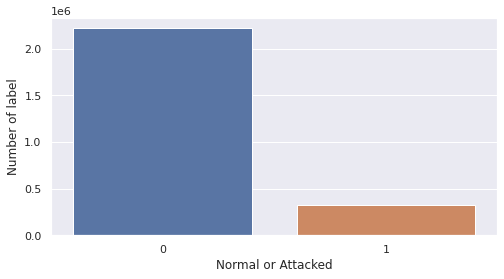

In [133]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(8, 4)})
plt.xlabel('Status')
sns.set_theme()
ax = sns.countplot(x='Label', data=network_data)
ax.set(xlabel='Normal or Attacked', ylabel='Number of label')
plt.show()

In [134]:
# check for some null or missing values in our dataset
network_data.isna().sum().to_numpy()

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0, 1348145, 1429879,       0,       0,       0,
             0,       0,       0,       0,       0, 2218764,       0])

In [135]:
list_drop = ['attack_cat']
network_data.drop(list_drop,axis=1,inplace=True)

In [136]:
network_data.shape

(2540047, 48)

In [137]:
data_cat = network_data.select_dtypes(exclude=[np.number]) 
data_cat.describe(include='all')

,srcip,sport,dstip,dsport,proto,state,service,ct_ftp_cmd
count,2540047,2540047,2540047,2540047,2540047,2540047,2540047,2540047
unique,43,100341,47,128297,135,16,13,13
top,59.166.0.4,1043,149.171.126.3,53,tcp,FIN,-,
freq,197959,216289,197771,619538,1495074,1478689,1246397,1429879


In [138]:
for feature in data_cat.columns:
    le = LabelEncoder()
    network_data[feature]= network_data[feature].astype(str)
    network_data[feature] = le.fit_transform( network_data[feature])

In [139]:
network_data.isnull().sum().to_numpy()

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0, 1348145, 1429879,       0,       0,       0,
             0,       0,       0,       0,       0,       0])

In [140]:
network_data=network_data.dropna()

In [141]:
network_data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [142]:
network_data.shape

(1087203, 48)

In [143]:
# make 2 seperate datasets for 2 feature labels
data_0 = network_data[network_data['Label'] == 0]
data_1 = network_data[network_data['Label'] == 1]

# make normal feature
y_0 = np.zeros(data_0.shape[0])
y_normal = pd.DataFrame(y_0)

# make attacked feature
y_1 = np.ones(data_1.shape[0])
y_attacked = pd.DataFrame(y_1)

# merging the original dataframe
X = pd.concat([data_0, data_1], sort=True)
y = pd.concat([y_normal, y_attacked], sort=True)

In [144]:
y_0,y_1

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

In [145]:
print(X.shape)
print(y.shape)
X.isnull().sum().to_numpy()

(1087203, 48)
(1087203, 1)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [146]:
network_data.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [147]:
from sklearn.utils import resample

data_0_resample = resample(data_0, n_samples=30000, 
                           random_state=123, replace=True)
data_1_resample = resample(data_1, n_samples=30000, 
                           random_state=123, replace=True)


In [148]:
train_dataset = pd.concat([data_0_resample, data_1_resample])
train_dataset.head(5)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
795845,33,20595,23,47706,114,5,0.052063,2958,32374,31,29,7,18,0,4.451530e+05,4.875170e+06,48,50,255,255,1240464839,1240735509,62,647,0,0,0.000000,66.978012,1421960148,1421960148,1.100894,1.050980,0.000684,0.000561,0.000123,0,0,0.0,0.0,1,4,4,3,3,1,1,1,0
300084,41,26713,27,63476,120,2,0.001757,528,304,31,29,0,0,0,1.803073e+06,1.038133e+06,4,4,0,0,0,0,132,76,0,0,0.650538,0.280968,1421939573,1421939573,0.463000,0.203667,0.000000,0.000000,0.000000,0,0,0.0,0.0,1,5,6,2,2,1,1,2,0
30440,28,24555,10,46242,120,6,0.000011,104,0,254,0,0,0,0,3.781818e+07,0.000000e+00,2,0,0,0,0,0,52,0,0,0,0.000000,0.000000,1421928573,1421928573,0.011000,0.000000,0.000000,0.000000,0.000000,0,2,0.0,0.0,1,14,14,5,5,5,1,5,0
216493,40,35484,27,46132,114,5,0.004555,1470,1728,31,29,5,4,0,2.465862e+06,2.818880e+06,22,14,255,255,663716757,664043135,67,123,0,0,13.299853,0.379383,1421935687,1421935687,0.216905,0.290615,0.000763,0.000622,0.000141,0,0,0.0,0.0,1,5,3,4,1,1,1,1,0
1013018,35,27527,23,12108,114,5,0.887698,2934,3742,31,29,11,15,3,2.593675e+04,3.310135e+04,52,54,255,255,3313217151,3310035329,56,69,0,0,1593.290145,53.076668,1421969597,1421969598,17.399391,16.739133,0.000653,0.000519,0.000134,0,0,0.0,1.0,2,2,1,4,10,1,1,2,0


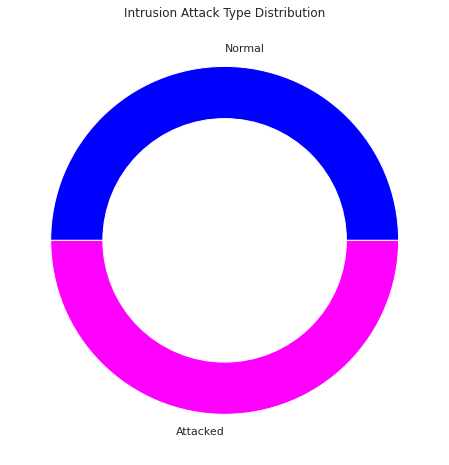

In [149]:
# viewing the distribution of intrusion attacks in our dataset 
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset['Label'].value_counts(), labels=['Normal', 'Attacked'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [150]:
test_dataset = train_dataset.sample(frac=0.1)
target_train = train_dataset['Label']
target_test = test_dataset['Label']
target_train.unique(), target_test.unique()

(array([0, 1]), array([1, 0]))

In [151]:
y_train = to_categorical(target_train, num_classes=2)
y_test = to_categorical(target_test, num_classes=2)

In [152]:
y_train,y_test

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32), array([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]], dtype=float32))

In [153]:
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values


In [154]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 47)
(6000, 47)
(60000, 2)
(6000, 2)


In [155]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((60000, 47, 1), (6000, 47, 1))

In [156]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(47, 1)))
    model.add(BatchNormalization())
    
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(47, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu', 
                    padding='same', input_shape=(47, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [157]:
model = model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 47, 64)            448       
                                                                 
 batch_normalization_9 (Batc  (None, 47, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 24, 64)            24640     
                                                                 
 batch_normalization_10 (Bat  (None, 24, 64)           256       
 chNormalization)                                                
                                                      

In [158]:
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=50, batch_size=32, 
          validation_data=(X_test, y_test), callbacks=[logger])

Epoch 1/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0921 - accuracy: 0.9625 - val_loss: 1.8866 - val_accuracy: 0.5025
Epoch 2/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0194 - accuracy: 0.9959 - val_loss: 1.4963 - val_accuracy: 0.5025
Epoch 3/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0505 - accuracy: 0.9811 - val_loss: 1.8044 - val_accuracy: 0.5025
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2586 - accuracy: 0.9052 - val_loss: 0.3092 - val_accuracy: 0.9038
Epoch 5/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2313 - accuracy: 0.9241 - val_loss: 0.2170 - val_accuracy: 0.9250
Epoch 6/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2184 - accuracy: 0.9261 - val_loss: 0.2058 - val_accuracy: 0.9335
Epoch 7/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2110 - accuracy: 0.9297 - val_loss: 0.1924 -

In [159]:
# check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

model.save("model.h5")
print("Saved model to disk")

188/188 [==============================] - 1s 5ms/step - loss: 0.1720 - accuracy: 0.9443
accuracy: 94.43%
Saved model to disk


In [160]:
# check history of model
history = his.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

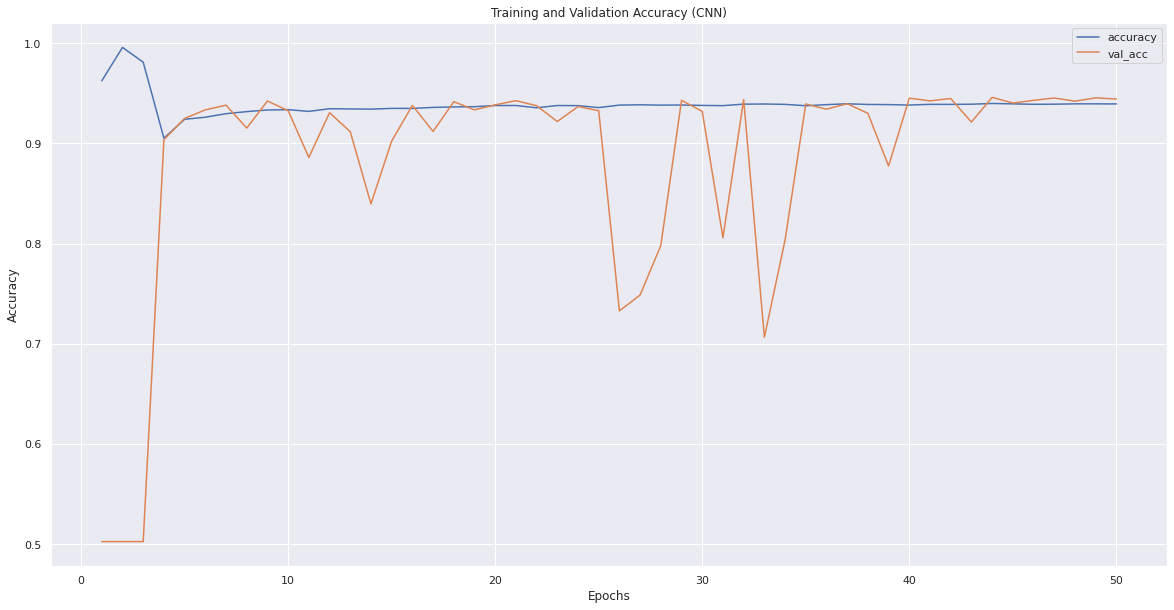

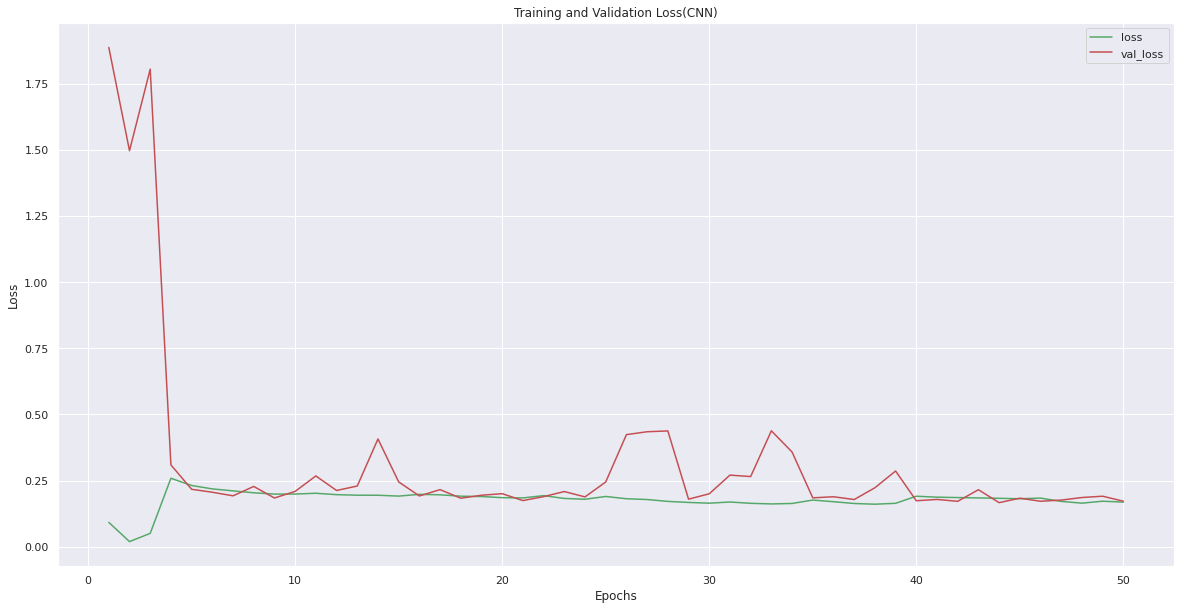

In [161]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(20, 10))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

188/188 [==============================] - 1s 5ms/step


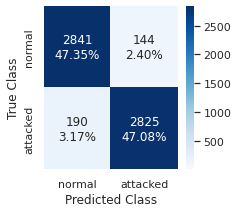

In [162]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support,  roc_curve, auc
import tensorflow as tf 
#model = tf.keras.models.load_model('/'+model_name+'.h5')

y_pred = model.predict(X_test)

y_pred_cm  = np.argmax(y_pred, axis=1)
y_test_cm  = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_cm, y_pred_cm) 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

label = ['normal','attacked']

plt.figure(figsize=(3,3))
sns.heatmap(cm, xticklabels=label, yticklabels=label, annot=labels, fmt='', cmap="Blues", vmin = 0.2);
# plt.title('Confusion Matrix for'+ modelName+' model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
# plt.savefig('./'+modelName+'_CM.png')
plt.show()

In [163]:
from sklearn.metrics import classification_report


print(classification_report(y_test_cm, y_pred_cm, target_names= ['normal','attacked']))
                            
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

# with open('./'+modelName+'_CR.txt','a') as f:
#     f.write(classification_report(y_test_cm, y_pred_cm, target_names= ['benign','ftp_bruteforce','ssh_bruteforce']))
#     f.write("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

              precision    recall  f1-score   support

      normal       0.94      0.95      0.94      2985
    attacked       0.95      0.94      0.94      3015

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000

188/188 [==============================] - 1s 5ms/step - loss: 0.1720 - accuracy: 0.9443
Test: accuracy = 0.944333  ;  loss = 0.172026
